# Chapter 8


시계열 분석에서 feature engineering할 때 고려해야 할 사항
* 정상성
* 도메인 지식
-----------------------------------------------------
자주 만드는 feature은?
* 평균과 분산
* 최댓값과 최솟값 -> 금융 시장에서는 금융의 안정성을 위해 하루 중 값의 최대 변동폭을 제한한다. 따라서, 최댓값 feature을 생성함으로써 이러한 변동폭을 조사한다.
* 시작값과 마지막 값의 차이





시계열 분석에서 feature engineering할 때 고려해야 할 사항
* 정상성
* 도메인 지식
-----------------------------------------------------
자주 만드는 feature은?
* 평균과 분산
* 최댓값과 최솟값 -> 금융 시장에서는 금융의 안정성을 위해 하루 중 값의 최대 변동폭을 제한한다. 따라서, 최댓값 feature을 생성함으로써 이러한 변동폭을 조사한다.
* 시작값과 마지막 값의 차이





시계열 분석에서 feature engineering할 때 고려해야 할 사항
* 정상성
* 도메인 지식
-----------------------------------------------------
자주 만드는 feature은?
* 평균과 분산
* 최댓값과 최솟값 -> 금융 시장에서는 금융의 안정성을 위해 하루 중 값의 최대 변동폭을 제한한다. 따라서, 최댓값 feature을 생성함으로써 이러한 변동폭을 조사한다.
* 시작값과 마지막 값의 차이





#### **생성된 특징들 중 일부를 선택하는 방법**

유용한 특징 선택 알고리즘 : FRESH
* 확장 가능한 가설 검정에 기반한 특징 추출
* 분산 방식으로 저장되는 경우가 많은 데이터를 병렬 계산을 용이하게 해줌
  + 1. 타깃 변수에 대한 각 feature의 p−value을 계산하여 중요도를 평가
  + 2. feature별 p−값은 벤자민-예쿠티에리 절차로 평가


### tsfresh 실습

로봇 실행 실패 관련 시계열 데이터를 다운로드

In [ ]:
# pip install tsfresh

In [ ]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures

download_robot_execution_failures()

timeseries, y = load_robot_execution_failures()

자동으로 feature을 추출

In [ ]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id = "id", column_sort = "time")

Feature Extraction: 100%|██████████| 528/528 [00:27<00:00, 19.47it/s]


In [ ]:
extracted_features.columns

Index(['F_x__variance_larger_than_standard_deviation',
       'F_x__has_duplicate_max', 'F_x__has_duplicate_min',
       'F_x__has_duplicate', 'F_x__sum_values', 'F_x__abs_energy',
       'F_x__mean_abs_change', 'F_x__mean_change',
       'F_x__mean_second_derivative_central', 'F_x__median',
       ...
       'T_z__fourier_entropy__bins_5', 'T_z__fourier_entropy__bins_10',
       'T_z__fourier_entropy__bins_100',
       'T_z__permutation_entropy__dimension_3__tau_1',
       'T_z__permutation_entropy__dimension_4__tau_1',
       'T_z__permutation_entropy__dimension_5__tau_1',
       'T_z__permutation_entropy__dimension_6__tau_1',
       'T_z__permutation_entropy__dimension_7__tau_1',
       'T_z__query_similarity_count__query_None__threshold_0.0',
       'T_z__mean_n_absolute_max__number_of_maxima_7'],
      dtype='object', length=4698)

총 4698개의 특징이 추출되었다.

이외에도 재귀특징제거법(RFE)으로 특징 선택 기법을 사용할 수 있다.

RFE? 모델 훈련 과정에서 중요하지 않은 특징을 반복적으로 제거한다.

FRESH 알고리즘이 고른 feature 목록 중 10개, FRESH 알고리즘이 기각한 feature 목록 중 10개를 무작위로 선택해 결합한다.

# Chapter 9

### cesium 패키지를 이용한 feature 생성


#### 데이터셋 다운로드

In [ ]:
# pip install cesium

import matplotlib.pyplot as plt
from cesium import datasets
eeg = datasets.fetch_andrzejak()

In [ ]:
type(eeg)

dict

In [ ]:
eeg.keys()

dict_keys(['times', 'measurements', 'classes', 'archive', 'header'])

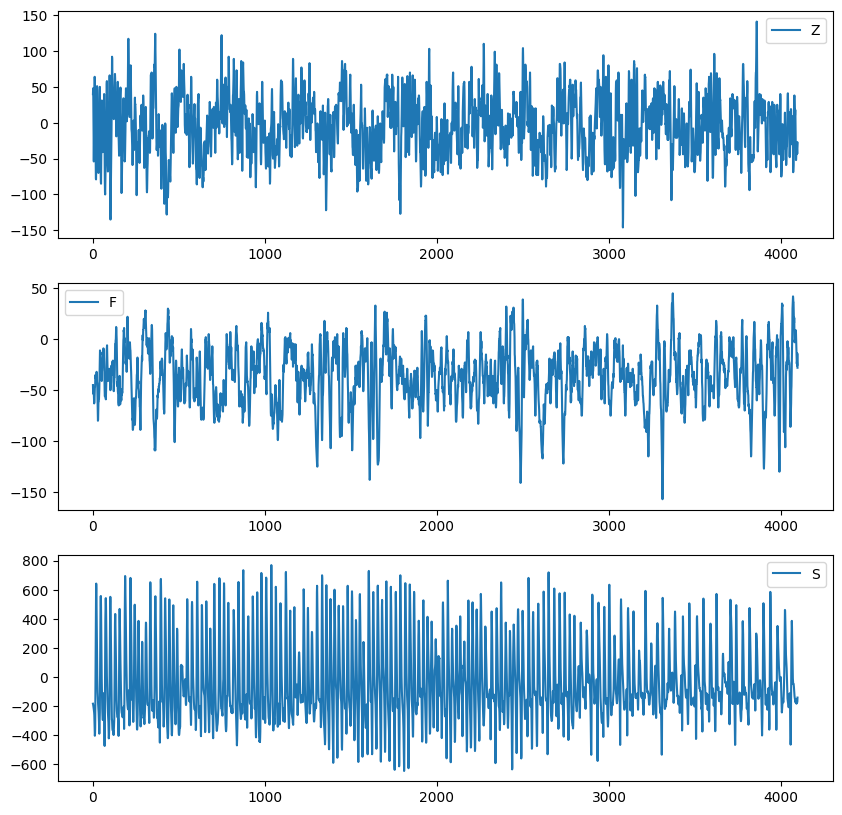

In [ ]:
plt.subplot(3, 1, 1)
plt.plot(eeg["measurements"][0])
plt.legend(eeg['classes'][0])
plt.subplot(3, 1, 2)
plt.plot(eeg["measurements"][300])
plt.legend(eeg['classes'][300])
plt.subplot(3, 1, 3)
plt.plot(eeg["measurements"][450])
plt.legend(eeg['classes'][450])

EEG 데이터셋 중 임의로 선택된 세 개의 표본에 대한 그래프. 서로 다른 시간에 서로 다른 환자를 대상으로 측정한 독립적인 시계열임.

* Z와 F는 S보다 덜 편향됨.
* y축을 보면 각 범주는 다른 범위의 값으로 구성됨. -> 진폭이 유용할 수 있다!

#### cesium으로 feature 생성

In [ ]:
from cesium.featurize import featurize_time_series as ft
features_to_use = ["amplitude", "percent_beyond_1_std", "percent_close_to_median", "skew", "max_slope"]
fset_cesium = ft(times = eeg["times"], values = eeg["measurements"], errors = None, features_to_use = features_to_use, scheduler = None)

In [ ]:
# amplitude = 진폭, percent_beyond_1_std = 표준편차의 1배 이상 떨어진 데이터의 비율
#  percent_close_to_median = 중위수와 가까운 데이터의 비율, skew = 비대칭성, max_slope = 최대 기울기

fset_cesium.head()

feature,amplitude,percent_beyond_1_std,percent_close_to_median,skew,max_slope
channel,0,0,0,0,0
0,143.5,0.327313,0.505004,0.032805,11107.796610
1,211.5,0.290212,0.640469,-0.092715,20653.559322
2,165.0,0.302660,0.515987,-0.004100,13537.627119
3,171.5,0.300952,0.541128,0.063678,17008.813559
4,170.0,0.305101,0.566268,0.142753,13016.949153


Note 1 : 정규화되지 않은 값들이 많음. 일부 기법은 정규화된 입력을 가정한다.

Note 2 : feature은 에르고딕이 되어야만 한다.

에르고딕이란? https://blog.naver.com/PostView.nhn?blogId=pro_000&logNo=221132612479

### Classification


기반이 되는 모델은 Decision Tree(결정 트리)

* 랜덤포레스트
   + 여러 개의 결정 트리를 사용하여 각 트리가 내놓은 출력의 평균을 분류/회귀의 결과로 활용한다.
   + 학습될 트리의 개수, 각 트리에 허용되는 최대 깊이에 대한 파라미터에 따라 구조가 결정된다. 과적합을 피하기 위해서 간단한 파라미터를 구성하는 것이 일반적이다.
   + 하지만 원시 시계열 데이터를 사용할 때는 다음과 같은 문제가 있다
      + 균일하지 않은 길이의 시계열을 다루는 것은 복잡할 수 있다.
      + 대규모 입력은 계산 비용이 비싼 모델과 학습 과정의 결과를 초래할 수 있다.
      + 특정 시간 단계가 매우 중요하지 않다고 가정하면, 트리 관점에서는 시간 단계를 개별 입력으로 봐서 매우 심한 노이즈가 존재한다.

  + 단, 원시 데이터가 특징들로 압축되어 요약하면 랜덤 포레스트가 유용할 수 있다.

* 그레이디언트 부스팅 트리
  + 부스팅 : 모델을 차례대로 생성해서 나중에 생성되는 모델이 이전 모델의 실수를 바로잡는 방향을 가진다.
  즉, 이전 모델에서 잘못 적합된 데이터는 나중 모델에서 더 큰 가중치를 가진다.
  + XGBoost 알고리즘은 모델의 복잡도에 대한 패널티 항을 포함한 손실 함수를 최소화한다. 이 패널티 항은 생성되는 트리의 개수를 제한한다.  
  + XGBoost의 절차

    1. 차례대로 트리를 만든다 - 각 트리는 이전 트리들의 feature 결합에 대한 잔차를 예측
    2. 첫 번째 트리는 데이터와 일치하려고 시도한다.
    3. 두 번째 트리는 잔차(y - y_hat)를 예측
    4. 세 번째 트리는 첫 번째 트리가 예측한 값과 첫 번째 트리의 잔차에 대해 두 번째 트리가 예측한 값을 뺀 것을 예측한다.



#### 학습용, 테스트용 데이터셋 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fset_cesium.values, eeg["classes"], random_state = 21)

#### 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, max_depth = 3, random_state = 21)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=21)

In [ ]:
rf_clf.score(X_test, y_test)

0.616

#### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 사용하여 클래스 레이블을 정수로 변환
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# XGBoost 모델 학습
xgb_clf = xgb.XGBClassifier(n_estimators = 10, max_depth = 3, random_state = 21)
xgb_clf.fit(X_train, y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# LabelEncoder를 사용하여 클래스 레이블을 정수로 변환
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

xgb_clf.score(X_test, y_test_encoded)

0.68

#### 학습 시간 비교

In [ ]:
import time

# xgboost
start = time.time()
xgb_clf.fit(X_train, y_train_encoded)
end = time.time()
end - start

0.2877931594848633

In [ ]:
# random forest
start = time.time()
rf_clf.fit(X_train, y_train)
end = time.time()
end - start

0.023016691207885742

랜덤포레스트보다 XGBoost의 성능이 더 좋은 이유
+ 분류 작업에 선택된 특징들이 모두 유용하다는 사실은 알 수 없다.
> 부스팅은 모든 feature을 사용하고 관련도가 높은 것에 가중치를 줘서 의미 없는 특징은 무시될 가능성이 높다.

  > 배깅의 결과로 얻은 트리들은 덜 의미 있는 feature의 사용을 강요하는 경우가 존재한다.

### Clustering


***분류와 예측 모두에 클러스터링이 사용될 수 있다.***

+ 분류 -> 원하는 수만큼의 집단을 모델의 학습 단계에서 식별할 수 있다.

+ 예측 -> 단순 클러스터링이나 거리 측정법을 이용하는 형태의 클러스터링이 사용될 수 있다.
  1. 특정 행동에 기반한 예측을 생성하기 위해 그 행동을 규정하는 규칙을 사용하는 것. N번의 time에 기반해 특정 시계열 샘플이 속한 클러스터를 결정하고, 해당 클러스터의 규칙에 따라 미래의 행동을 추론

  2. 표본 시계열의 미래 행동을 표본 공간의 최근접이웃의 행동에 기반하여 예측. N번의 time에 기반하여 해당 시계열의 최근접 이웃들을 찾고, 이 최근접이웃들의 N+h번째 행동의 평균을 구한다. 그리고 이것을 표본 시계열의 예측으로 사용한다.


\

***시계열 데이터에 클러스터링 기법을 적용하는 상황에서의 거리 측정법***

+ 특징에 기반한 거리 :
시계열을 위한 특징을 생성하고, 이들을 데이터의 계산을 위한 좌표로 취급
+ 원시 시계열 데이터에 기반한 거리 :
서로 다른 시계열이 얼마나 가까운지 결정하는 방법을 찾음


In [3]:
pip install dtaidistance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.3 MB/s eta 0:00:00


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

from math import sqrt

from datetime import datetime
import pandas as pd
import numpy as np
import pdb


from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

from sklearn.metrics.pairwise import pairwise_distances
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import homogeneity_score, completeness_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster import homogeneity_score

from dtaidistance import dtw

from collections import Counter

from scipy.stats import pearsonr

In [5]:
words = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/50words_TEST.csv',
                   header = None)

In [ ]:
words.rename(columns = {0:'word'}, inplace = True)

In [ ]:
words.head()

,word,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,270
0,4,-0.89094,-0.86099,-0.82438,-0.78214,-0.73573,-0.68691,-0.63754,-0.589370,-0.543420,...,-0.86309,-0.86791,-0.87271,-0.87846,-0.88592,-0.89619,-0.90783,-0.91942,-0.93018,-0.93939
1,12,-0.78346,-0.68562,-0.58409,-0.47946,-0.37398,-0.27008,-0.17225,-0.087463,-0.019191,...,-0.88318,-0.89189,-0.90290,-0.91427,-0.92668,-0.93966,-0.95244,-0.96623,-0.98050,-0.99178
2,13,-1.32560,-1.28430,-1.21970,-1.15670,-1.09980,-1.04960,-1.01550,-0.996720,-0.985040,...,-0.83499,-0.86204,-0.88559,-0.90454,-0.93353,-0.99135,-1.06910,-1.13680,-1.19800,-1.27000
3,23,-1.09370,-1.04200,-0.99840,-0.95997,-0.93997,-0.93764,-0.92649,-0.857090,-0.693320,...,-0.72810,-0.74512,-0.76376,-0.78068,-0.80593,-0.84350,-0.89531,-0.96052,-1.05090,-1.12830
4,4,-0.90138,-0.85228,-0.80196,-0.74932,-0.69298,-0.63316,-0.57038,-0.506920,-0.446040,...,-0.95452,-0.97322,-0.98984,-1.00520,-1.01880,-1.02960,-1.03700,-1.04110,-1.04180,-1.04030


1D 히스토그램

Text(0.5, 0.98, 'Sample word projections and histograms of the projections')

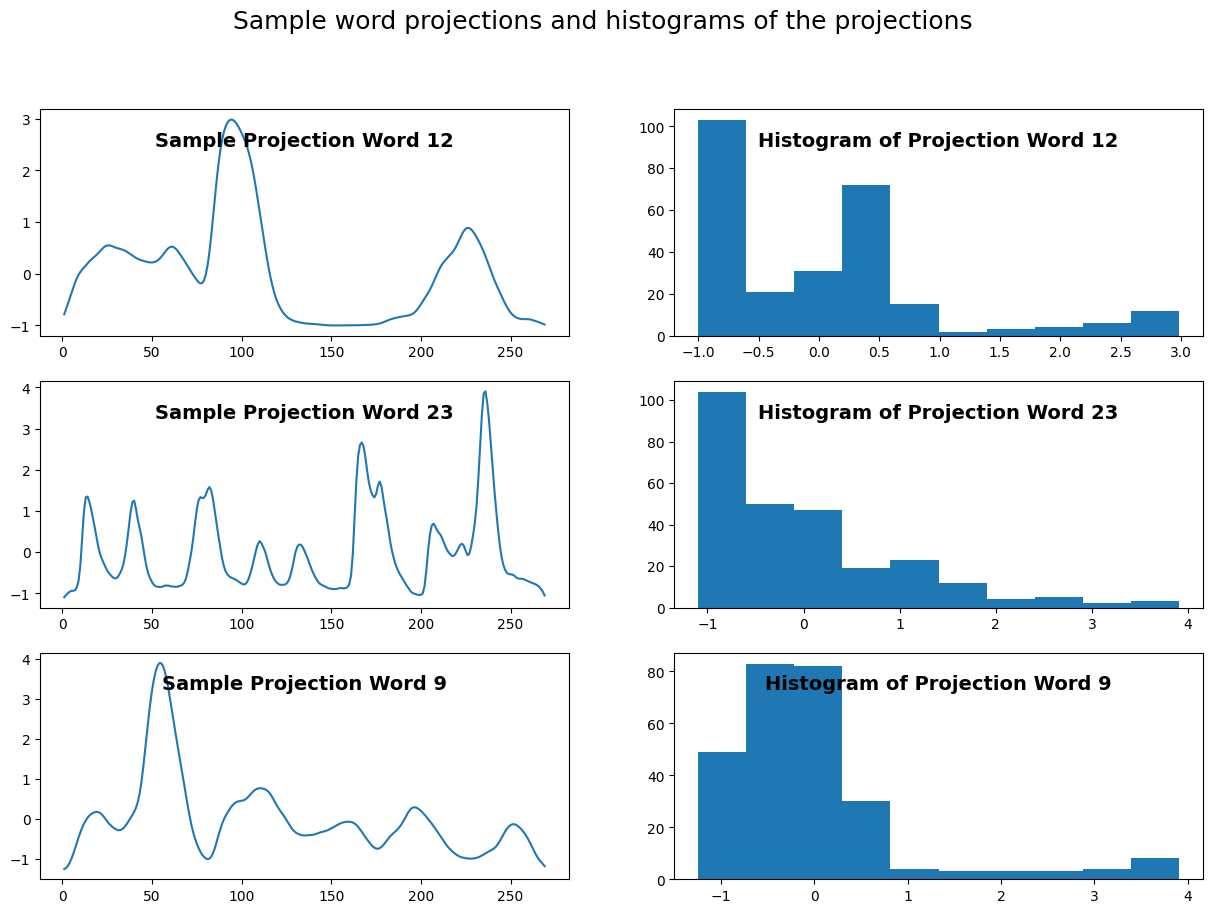

In [ ]:
plt.subplot(3, 2, 1)
plt.plot(words.iloc[1, 1:-1])
plt.title("Sample Projection Word " + str(words.word[1]), fontweight = 'bold', y = 0.8, fontsize = 14)
plt.subplot(3, 2, 2)
plt.hist(words.iloc[1, 1:-1], 10)
plt.title("Histogram of Projection Word " + str(words.word[1]), fontweight = 'bold', y = 0.8, fontsize = 14)
plt.subplot(3, 2, 3)
plt.plot(words.iloc[3, 1:-1])
plt.title("Sample Projection Word " + str(words.word[3]), fontweight = 'bold', y = 0.8, fontsize = 14)
plt.subplot(3, 2, 4)
plt.hist(words.iloc[3, 1:-1], 10)
plt.title("Histogram of Projection Word " + str(words.word[3]), fontweight = 'bold', y = 0.8, fontsize = 14)
plt.subplot(3, 2, 5)
plt.plot(words.iloc[5, 1:-1])
plt.title("Sample Projection Word " + str(words.word[11]), fontweight = 'bold', y = 0.8, fontsize = 14)
plt.subplot(3, 2, 6)
plt.hist(words.iloc[5, 1:-1], 10)
plt.title("Histogram of Projection Word " + str(words.word[11]), fontweight = 'bold', y = 0.8, fontsize = 14)
plt.suptitle("Sample word projections and histograms of the projections", fontsize = 18)

270 time을 가진 시계열의 특징 생성  

In [ ]:
words.shape

(455, 271)

In [ ]:
words_features = words.iloc[:, 1:271]

In [ ]:
from cesium.featurize import featurize_time_series as ft

word_vals = words.iloc[:, 1:271]
times = []
word_values = []
for idx, row in word_vals.iterrows():
  word_values.append(row.values)
  times.append(np.array([i for i in range(row.values.shape[0])]))

features_to_use = ['amplitude', 'percent_beyond_1_std', 'percent_close_to_median']
featurized_words = ft(times = times, values = word_values, errors = None, features_to_use = features_to_use, scheduler = None)

In [ ]:
featurized_words.head()

feature,amplitude,percent_beyond_1_std,percent_close_to_median
channel,0,0,0
0,1.674555,0.188889,0.451852
1,1.990520,0.118519,0.259259
2,2.903650,0.114815,0.637037
3,2.515050,0.211111,0.562963
4,1.966150,0.181481,0.533333


히스토그램을 생성하고 이를 또 다른 시계열로 취급해서 특징을 생성

In [ ]:
times = []
hist_values = []
for idx, row in words_features.iterrows():
  hist_values.append(np.histogram(row.values, bins = 10, range=(-2.5, 5.0))[0]+.0001)
	## 0들은 하위 작업에서 문제를 초래
  times.append(np.array([i for i in range(9)]))

features_to_use = ["amplitude", "percent_close_to_median", "skew"]
featurized_hists = ft(times = times, values = hist_values, errors = None, features_to_use = features_to_use, scheduler = None)

In [ ]:
featurized_hists.head()

feature,amplitude,percent_close_to_median,skew
channel,0,0,0
0,88.0,0.444444,2.262655
1,61.0,0.666667,1.285343
2,70.0,0.666667,1.683031
3,67.0,0.555556,1.724109
4,75.0,0.777778,1.902513


서로 다른 방식으로 얻은 특징들을 결합

In [ ]:
features = pd.concat([featurized_words.reset_index(drop=True), featurized_hists], axis = 1)

In [ ]:
features.head()

feature,amplitude,percent_beyond_1_std,percent_close_to_median,amplitude,percent_close_to_median,skew
channel,0,0,0,0,0,0
0,1.674555,0.188889,0.451852,88.0,0.444444,2.262655
1,1.990520,0.118519,0.259259,61.0,0.666667,1.285343
2,2.903650,0.114815,0.637037,70.0,0.666667,1.683031
3,2.515050,0.211111,0.562963,67.0,0.555556,1.724109
4,1.966150,0.181481,0.533333,75.0,0.777778,1.902513


### 시간을 인식하는 거리 측정법
시계열 간의 유사성 측정 문제를 다루기 위한 거리 지표를 정의 : 동적시간왜곡(DTW)

https://ds-magazine.tistory.com/entry/%EC%8B%9C%EA%B3%84%EC%97%B4-%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%97%90-K-%ED%8F%89%EA%B7%A0-%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81%EC%9D%84-%EC%A0%81%EC%9A%A9%ED%95%98%EB%8A%94-%EB%B0%A9%EB%B2%95

DTW의 규칙

+ 한 시계열의 모든 시간은 최소한 다른 시계열의 한 시간에 대응해야 한다
+ 각 시계열의 처음과 끝은 서로 처음과 끝에 대응해야 한다
+ 시간 의 매핑은 과거가 아니라 미래로 이동하는 관계만 표현해야 한다

DTW 이외에도 시계열 간 거리를 측정하는 방법

+ 프레셰 거리
: 시간 왜곡과 비슷한 두 곡선의 순회 동안 두 곡선 간 거리를 최소화할 수 있는 최대 거리

+ 피어슨 상관
: 상관관계 지표를 최대화하여 시계열 간의 거리를 최소화

+ 최장공통부분수열
: 일련의 범주형값을 나타내는 시계열에 적합한 거리 측정으로 최장공통부분수열로 두 시계열의 유사성을 판단

\

주의할 점은 시계열에서 유클리드 거리를 사용하지 말 것!

DTW 알고리즘 구현


In [6]:
def distDTW(ts1, ts2):
	## 설정과정
    DTW = {}
    for i in range(len(ts1)):
      DTW[(i, -1)] = np.inf
    for i in range(len(ts2)):
      DTW[(-1, i)] = np.inf
    DTW[(-1, -1)] = 0

    ## 한 번에 한 단계씩
    ## 최적값 계산
    for i in range(len(ts1)):
      for j in range(len(ts2)):
          dist = (ts1[i] - ts2[j])**2
          DTW[(i, j)] = dist + min(DTW[(i-1, j)], DTW[(i, j-1)], DTW[(i-1, j-1)])

    ## 동적 프로그래밍의 한 예
    ## 완전한 경로를 찾으면 그 경로를 반환한다
    return sqrt(DTW[len(ts1)-1, len(ts2)-1])

### 정규화된 특징에 대한 계층적 클러스터링



특징들은 서로 다른 단위의 크기를 가질 수 있어서 단일 거리 지표를 적용하려면 정규화해야 한다

In [ ]:
from sklearn import preprocessing
feature_values = preprocessing.scale(features.values)

계층적 클러스터링 알고리즘을 사용하고, 데이터셋에 포함된 단어 50개에 매칭되는 클러스터링을 찾기 위해 클러스터 50개에 대한 적합을 수행

In [ ]:
clustering = AgglomerativeClustering(n_clusters=50, linkage='ward')
clustering.fit(feature_values)
words['feature_label'] = clustering.labels_

In [ ]:
words['feature_label'] = words.feature_label.astype('category')

In [ ]:
## the number of feature labels
results = words.groupby('word')['feature_label'].agg(num_clustering_labels=lambda x: len(set(x)),
                                                     num_word_samples=lambda x: len(x),
                                                     most_common_label=lambda x: Counter(x).most_common(1)[0][0])
results.head()

,num_clustering_labels,num_word_samples,most_common_label
word,,,
1,19,57,38
2,19,42,29
3,16,28,37
4,17,34,17
5,13,25,8


In [ ]:
# the number of feature labels
results_feats = words.groupby('feature_label')['word'].agg(num_words=lambda x: len(set(x)),
                                                           num_feat_samples=lambda x: len(x),
                                                           most_common_word=lambda x: Counter(x).most_common(1)[0][0])

results_feats

,num_words,num_feat_samples,most_common_word
feature_label,,,
0,9,16,2
1,5,5,13
2,7,8,16
3,8,9,1
4,10,20,1
5,4,8,2
6,5,6,15
7,6,6,7
8,6,17,5


클러스터가 단어 레이블에 대해 유용한 대응르 보이는지 확인

In [ ]:
homogeneity_score(words.word, words.feature_label)

0.5085776345414814

계층적 클러스터링? https://depotceffio.tistory.com/entry/%EA%B3%84%EC%B8%B5%EC%A0%81-%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81-Hierarchical-Clustering-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0